# One dimensional Neural Network

In [67]:
from neuralnetwork.datasets import blobs, nregion, circle
from neuralnetwork import Network

Layer: L0, Neurons: 1, Activation: None, Weights: (0, 0), Biases: (0, 0)
Layer: L1, Neurons: 8, Activation: absolute, Weights: (8, 1), Biases: (8, 1)
Layer: L2, Neurons: 8, Activation: relu, Weights: (8, 8), Biases: (8, 1)
Layer: L3, Neurons: 1, Activation: sigmoid_10, Weights: (1, 8), Biases: (1, 1)


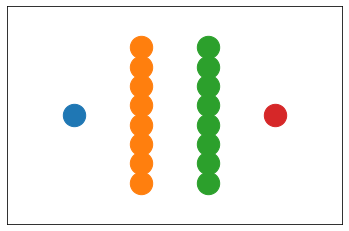

In [68]:
# Example Network
mynetwork = Network(1)
mynetwork.add_layer(50, activation = 'absolute' )
mynetwork.add_layer(5, activation = 'relu')
mynetwork.add_layer(1, activation = 'sigmoid_10')
mynetwork.summary()

# Simple Prediction

# Load Dataset

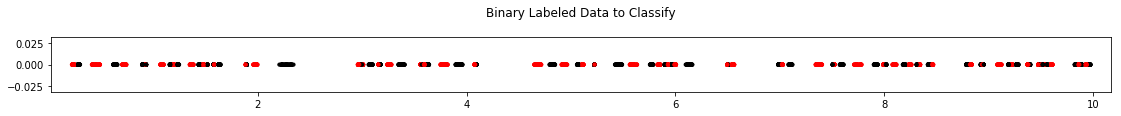

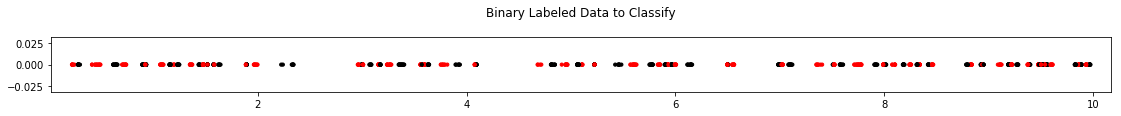

In [86]:
X_train, Y_train, X_val, Y_val, C, R = nregion.load_random_regions(regions=100, validation = 0.20, points=50)
nregion.graph(X_train, Y_train, size = 10)
nregion.graph(X_val, Y_val, size = 10)

In [87]:
len(C)

50

# N region initialization

In [71]:
import numpy as np

In [72]:
slope = 5

In [73]:
# Change the slopes of first layer to 1
mynetwork.layers['L1']['weights'] = slope*np.ones_like(mynetwork.layers['L1']['weights'])
mynetwork.layers['L1']['weights']

array([[5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.]])

In [74]:
# Change the biases to the list of centers
mynetwork.layers['L1']['biases'] = -np.array(C).reshape(mynetwork.layers['L1']['biases'].shape)*slope
mynetwork.layers['L1']['biases']

array([[-12.50515231],
       [-17.01239139],
       [-20.18447269],
       [-27.36181965],
       [-31.06272957],
       [-36.71675049],
       [-38.816449  ],
       [-42.58622339]])

In [75]:
mynetwork.layers['L2']['weights'] = -np.identity(mynetwork.layers['L2']['weights'].shape[0], dtype=None)
mynetwork.layers['L2']['weights']

array([[-1., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -1., -0., -0., -0., -0., -0., -0.],
       [-0., -0., -1., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -1., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -1., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -1., -0., -0.],
       [-0., -0., -0., -0., -0., -0., -1., -0.],
       [-0., -0., -0., -0., -0., -0., -0., -1.]])

In [76]:
mynetwork.layers['L2']['biases'] = np.array(R).reshape(mynetwork.layers['L2']['biases'].shape)*(slope)+min(R)*slope
mynetwork.layers['L2']['biases']

array([[0.50824521],
       [0.06020989],
       [0.19775289],
       [0.20799583],
       [0.71605113],
       [0.21223369],
       [0.37290083],
       [0.06569701]])

In [77]:
mynetwork.layers['L3']['weights'] = np.ones_like(mynetwork.layers['L3']['weights'])
mynetwork.layers['L3']['weights']

array([[1., 1., 1., 1., 1., 1., 1., 1.]])

In [78]:
mynetwork.layers['L3']['biases'] = -min(R)*slope
mynetwork.layers['L3']['biases']

-0.030104947271779592

# Graph the decision boundary

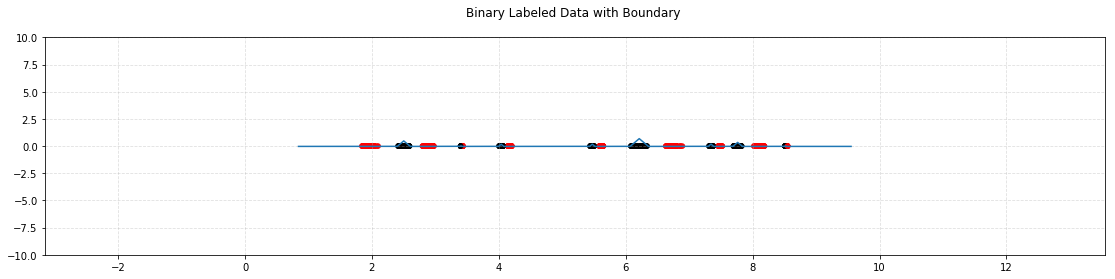

In [79]:
# Graph Decision Boundary|
nregion.graph(X_train, Y_train, decision = mynetwork.decision, padding=5, size=20)

In [80]:
mynetwork.accuracy(X_train,Y_train)

1.0

In [81]:
mynetwork.binary_crossentropy_loss(X_train,Y_train)

0.4648101774918204

In [82]:
#mynetwork.train_slopes_only()

# Backward pass illusrated

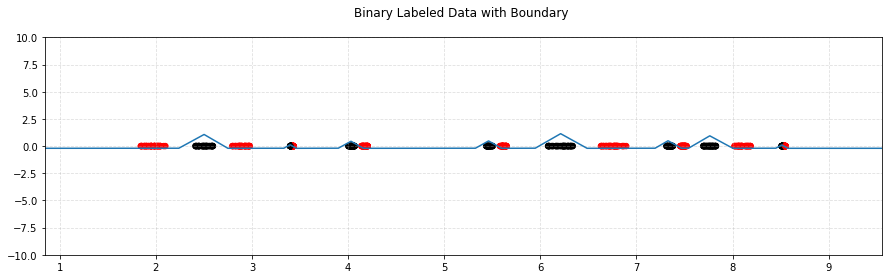

loss: 0.151 acc:  100% val_loss: 0.181 val_acc:  100%


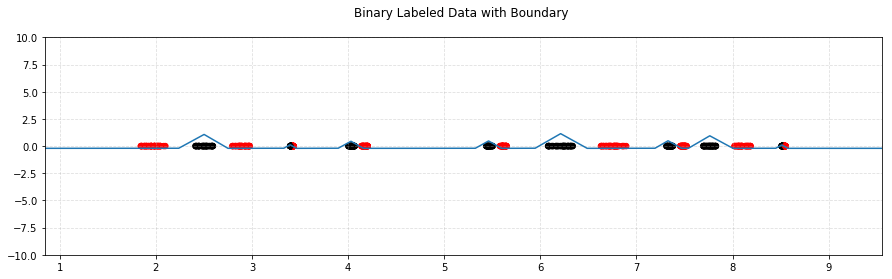

loss: 0.150 acc:  100% val_loss: 0.180 val_acc:  100%


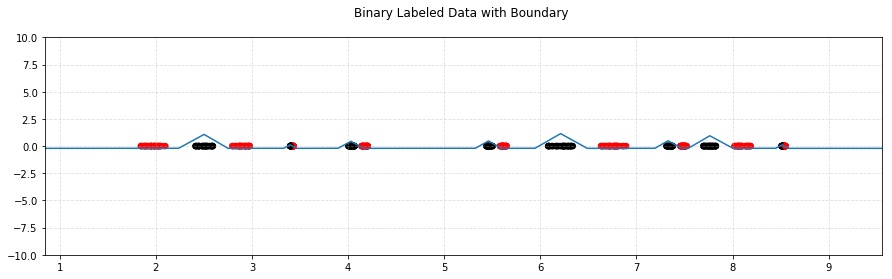

loss: 0.149 acc:  100% val_loss: 0.179 val_acc:  100%


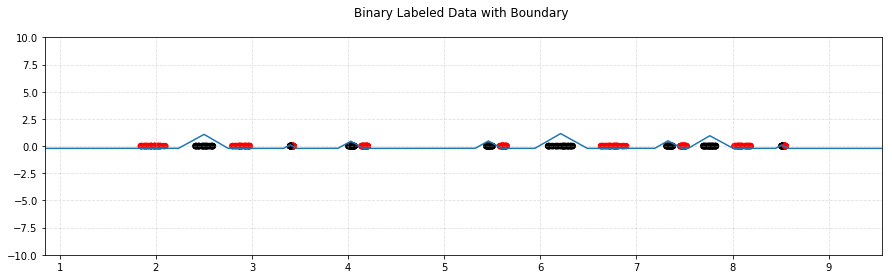

loss: 0.148 acc:  100% val_loss: 0.178 val_acc:  100%


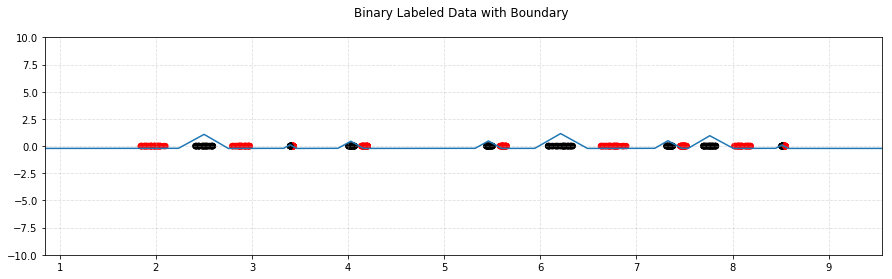

loss: 0.147 acc:  100% val_loss: 0.177 val_acc:  100%


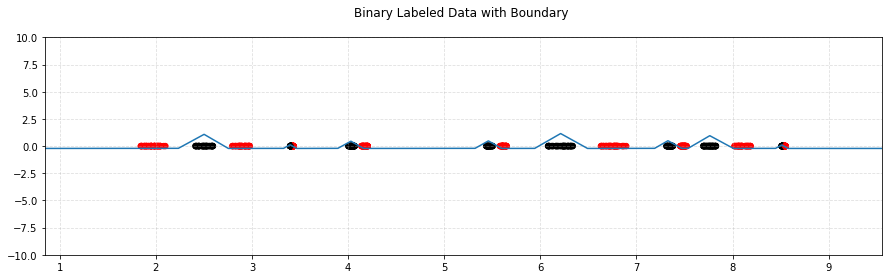

loss: 0.146 acc:  100% val_loss: 0.176 val_acc:  100%


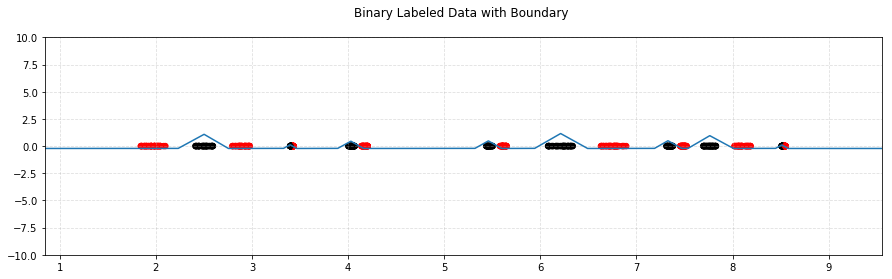

loss: 0.144 acc:  100% val_loss: 0.175 val_acc:  100%


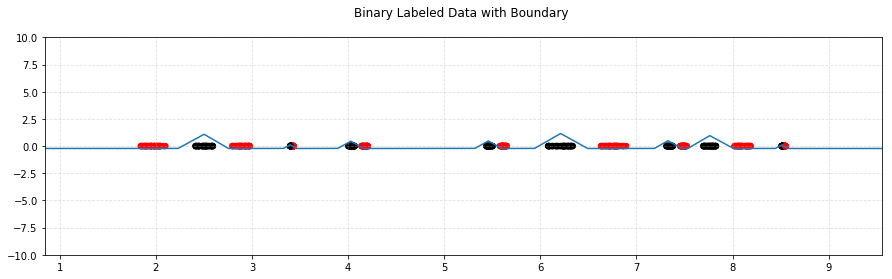

loss: 0.144 acc:  100% val_loss: 0.175 val_acc:  100%


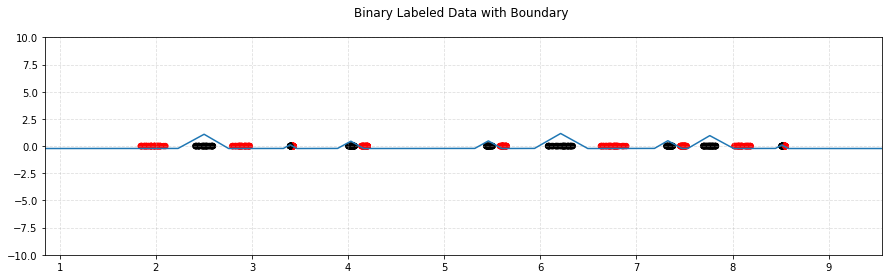

loss: 0.143 acc:  100% val_loss: 0.174 val_acc:  100%


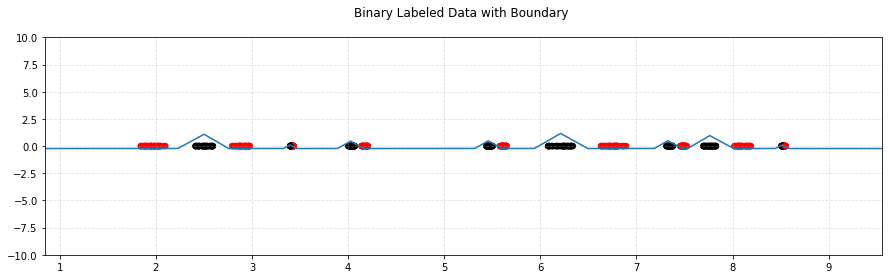

loss: 0.142 acc:  100% val_loss: 0.173 val_acc:  100%


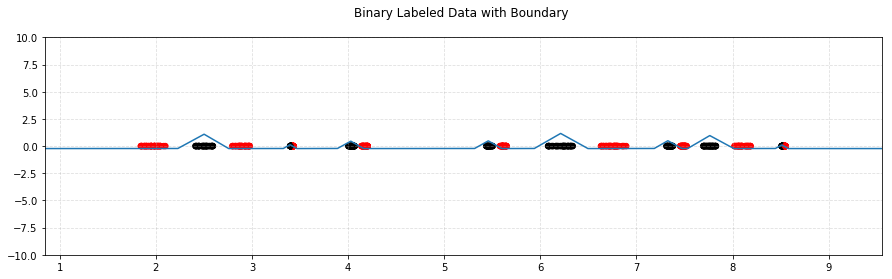

loss: 0.141 acc:  100% val_loss: 0.172 val_acc:  100%


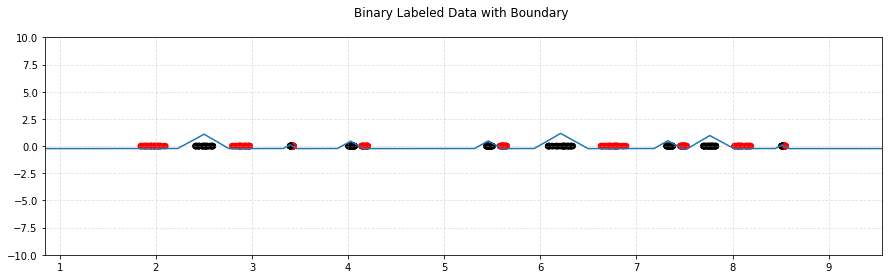

loss: 0.140 acc:  100% val_loss: 0.172 val_acc:  100%


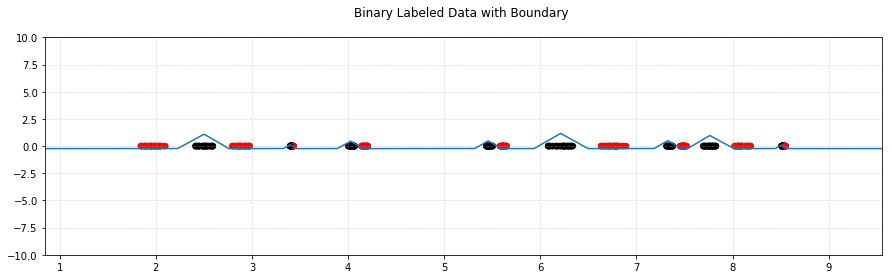

loss: 0.139 acc:  100% val_loss: 0.171 val_acc:  100%


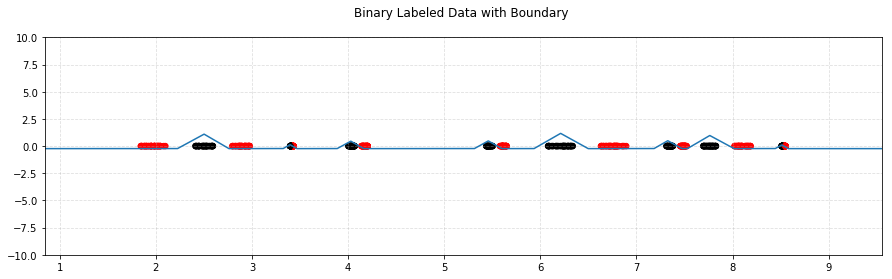

loss: 0.138 acc:  100% val_loss: 0.171 val_acc:  100%


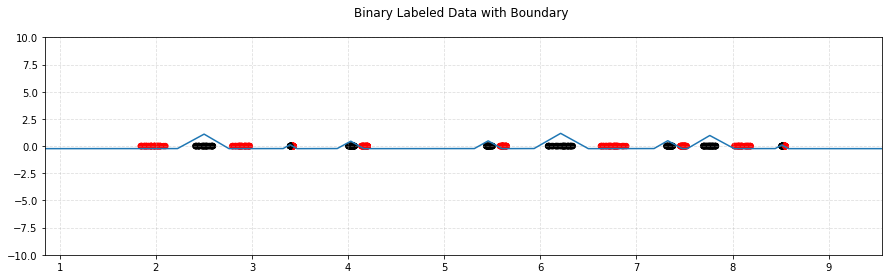

loss: 0.138 acc:  100% val_loss: 0.170 val_acc:  100%


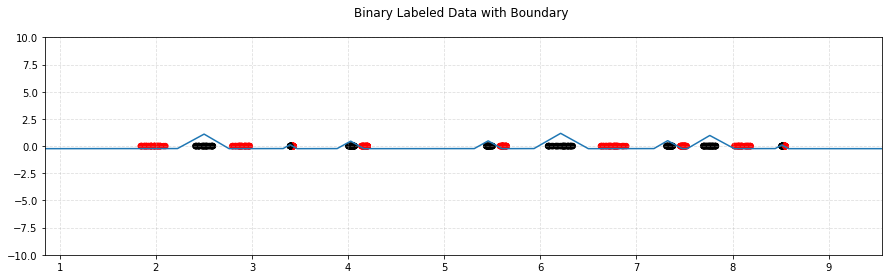

loss: 0.137 acc:  100% val_loss: 0.169 val_acc:  100%


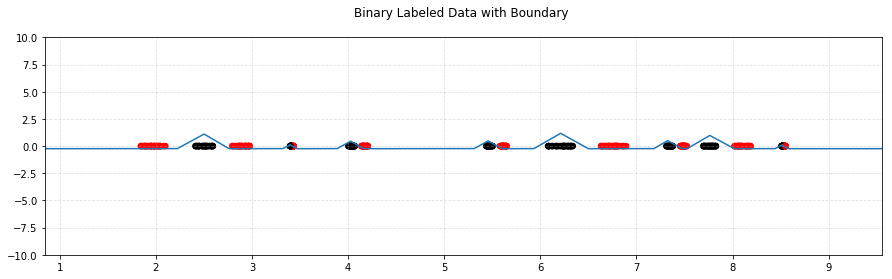

loss: 0.136 acc:  100% val_loss: 0.169 val_acc:  100%


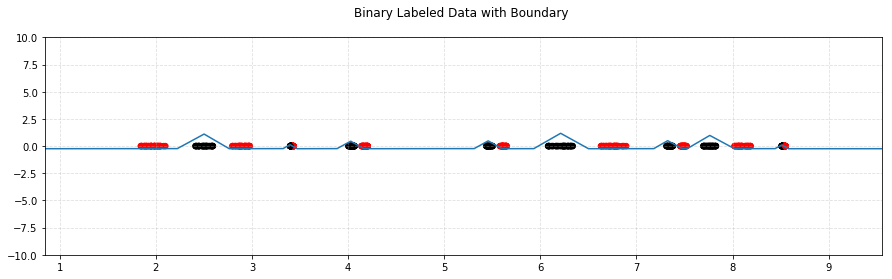

loss: 0.136 acc:  100% val_loss: 0.168 val_acc:  100%


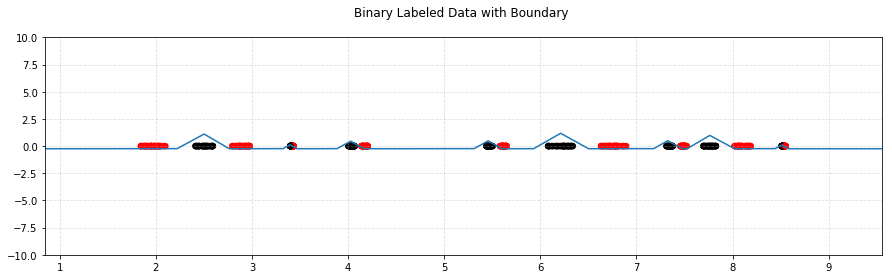

loss: 0.135 acc:  100% val_loss: 0.168 val_acc:  100%


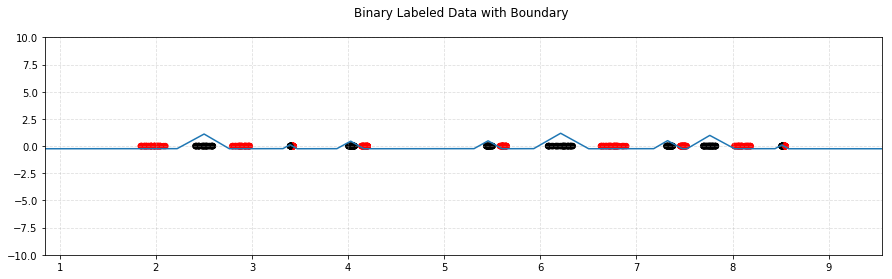

loss: 0.134 acc:  100% val_loss: 0.167 val_acc:  100%


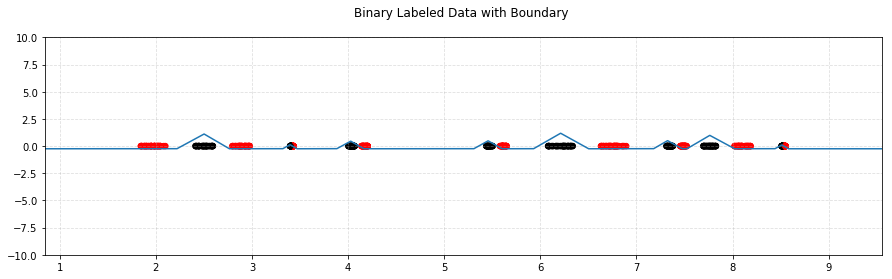

loss: 0.134 acc:  100% val_loss: 0.167 val_acc:  100%


In [85]:
import matplotlib.pyplot as plt
import numpy as np
decision = mynetwork.decision
learning_rate = 0.00001
for n in range(100):
    #mynetwork.train_mini_batch(X_train, Y_train, learning_rate=0.01, num_epochs=100, batch_size=X_train.shape[0], validation_data = (X_val,Y_val),verbose=False)
    mynetwork.train_mini_batch(X_train, Y_train, learning_rate=learning_rate, num_epochs=1000, batch_size=128, validation_data = (X_val,Y_val),verbose=False)
    plt.figure(figsize=(15,4))
    plt.scatter(X_train[:,0], np.zeros(X_train[:,0].shape), c=Y_train, cmap='flag', s = 30)
    plt.grid(alpha=.4,linestyle='--')
    X_line = np.arange(min(X_train[:,0])-1, max(X_train[:,0])+1, (max(X_train[:,0])-1 - min(X_train[:,0])-1)/5000)
    X_line_reshape = X_line.reshape(X_line.shape[0],1)
    Y_line = [decision(X_line_reshape[i])[0][0] for i in range(len(X_line_reshape))]
    plt.plot(X_line, Y_line)
    plt.title('Binary Labeled Data with Boundary \n')
    plt.ylim(-10,10)
    plt.xlim(min(X_train[:,0])-1, max(X_train[:,0])+1)
    x = np.array(range(100))
    plt.show()
    plt.close()
    loss = mynetwork.binary_crossentropy_loss(X_train,Y_train)
    acc = mynetwork.accuracy(X_train,Y_train)
    val_loss = mynetwork.binary_crossentropy_loss(X_val,Y_val)
    val_acc = mynetwork.accuracy(X_val,Y_val)
    print(f"loss: {loss:.3f} acc: {acc: 0.0%} val_loss: {val_loss:.3f} val_acc: {val_acc: 0.0%}")
    if val_acc == 1 and n>=20:
        break